In [27]:
import numpy as np
import pandas as pd

df = pd.read_csv("BTC_ETH_SOL_XRP_DOGE_APE_2021_2022_1M.csv")

In [28]:
df.head()

df["close_mid_price"] = df["close_mid_price"].astype("float")

# btc = df.loc[df['symbol'].str.contains("BTC")]
# dog = df.loc[df['symbol'].str.contains("DOG")]
# eth = df.loc[df['symbol'].str.contains("ETH")]
# xrp = df.loc[df['symbol'].str.contains("SOL")]
# sol = df.loc[df['symbol'].str.contains("XRP")]
# ape = df.loc[df['symbol'].str.contains("APE")]
# ape.head()

In [29]:
df = df.set_index(['timestamp', 'symbol'])['close_mid_price'] \
    .unstack() \
    .add_prefix('') \
    .rename_axis([None], axis=1) \
    .reset_index()

In [30]:
df_w0_ts = df.drop(['timestamp'], axis=1)
df_w0_ts = (df_w0_ts - df_w0_ts.mean()) / df_w0_ts.std()

df_diff = df_w0_ts.diff()

df_w0_ts["timestamp"] = df["timestamp"]
df_diff["timestamp"] = df["timestamp"]
df = df_w0_ts

In [31]:
df = df.reindex(columns=reversed(sorted(df.columns)))
df_diff = df_diff.reindex(columns=reversed(sorted(df_diff.columns)))
del df["APE-PERP"]
df

,timestamp,XRP-PERP,SOL-PERP,ETH-PERP,DOGE-PERP,BTC-PERP
0,2021-01-01 00:01:00 UTC,-1.582061,-1.194479,-1.932957,-1.453424,-1.070291
1,2021-01-01 00:02:00 UTC,-1.578833,-1.194382,-1.930775,-1.453357,-1.069996
2,2021-01-01 00:03:00 UTC,-1.579396,-1.194401,-1.931715,-1.453379,-1.067950
3,2021-01-01 00:04:00 UTC,-1.579809,-1.194401,-1.931568,-1.453377,-1.067929
4,2021-01-01 00:05:00 UTC,-1.578795,-1.194421,-1.932184,-1.453370,-1.069194
...,...,...,...,...,...,...
875262,2022-08-31 23:56:00 UTC,-1.256825,-0.727851,-1.080681,-0.943900,-1.825994
875263,2022-08-31 23:57:00 UTC,-1.257201,-0.727520,-1.080316,-0.943667,-1.826078
875264,2022-08-31 23:58:00 UTC,-1.256788,-0.727345,-1.080003,-0.943476,-1.825656
875265,2022-08-31 23:59:00 UTC,-1.256863,-0.727715,-1.081777,-0.943138,-1.825572


In [32]:
df.to_csv("transformed_crypto.csv")

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

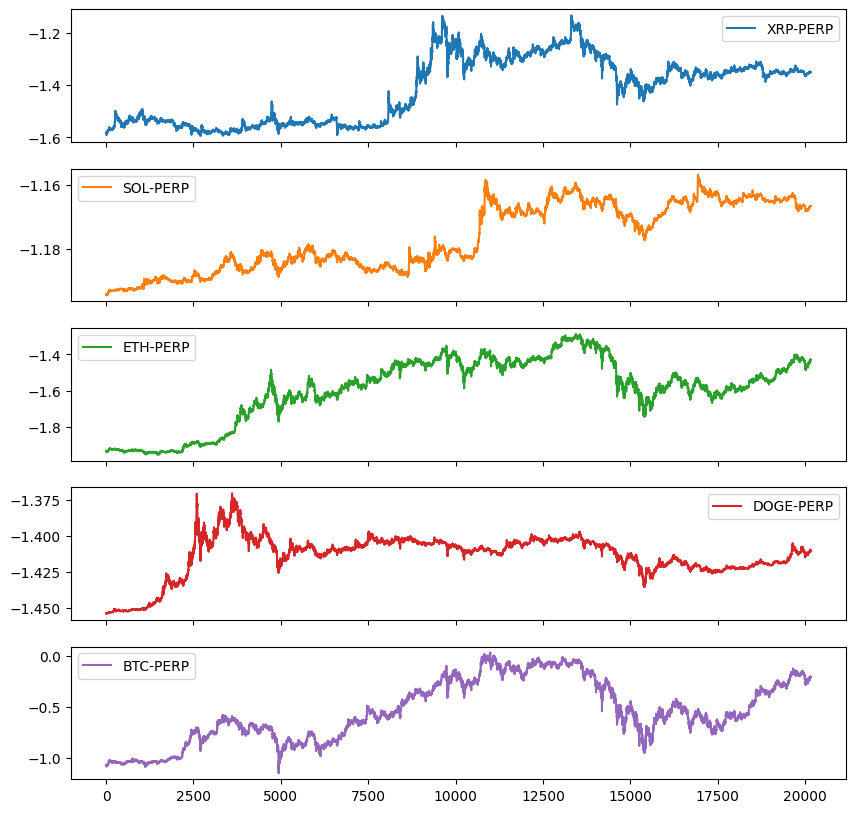

In [33]:
df[df["timestamp"] <= "2021-01-15"].plot(subplots=True, figsize=(10, 10))

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

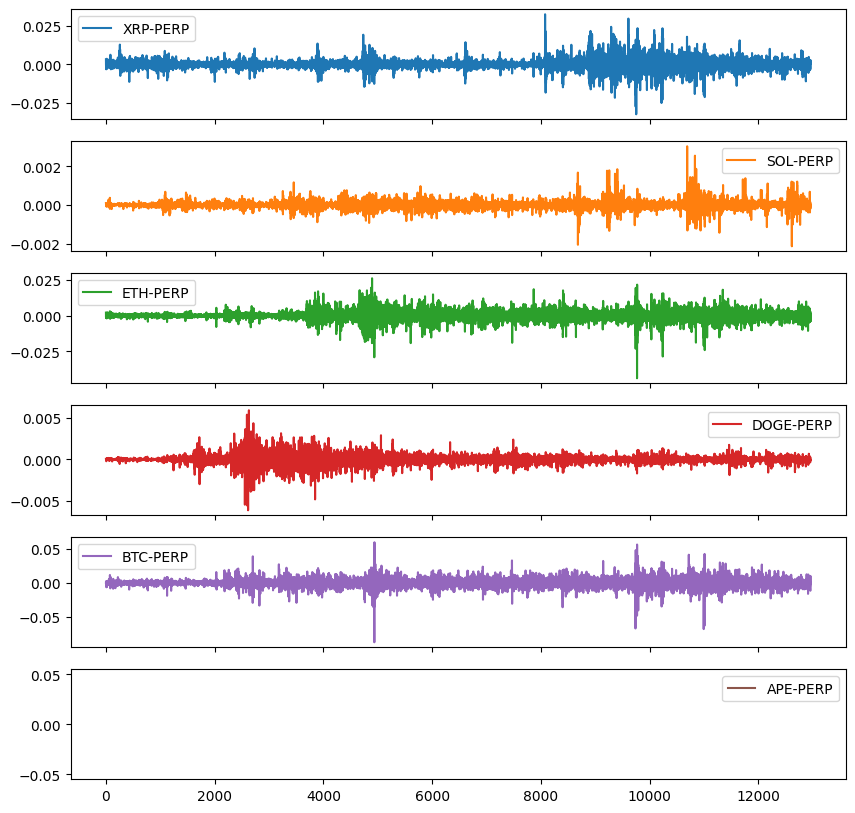

In [34]:
df_diff[df_diff["timestamp"] <= "2021-01-10"].plot(subplots=True, figsize=(10, 10))

In [39]:
import numpy as np
temp = df["timestamp"]
del df["timestamp"]
df_log_r = np.log(df / df.shift(1))
df_log_r["timestamp"] = temp

/home/dario/PycharmProjects/BAINSACryptocurrencies/venv/lib/python3.10/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [43]:
df_log_r = df_log_r.dropna()
df_log_r.to_csv("crypto_differences.csv")